# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
!ls
%mkdir data
!ls

data  drive  entrenamiento.csv	prueva.csv  sample_data
mkdir: cannot create directory ‘data’: File exists
data  drive  entrenamiento.csv	prueva.csv  sample_data


In [4]:
import shutil

shutil.copy("/content/drive/MyDrive/IA/Bank_registries.csv","/content/data/ex2data1.txt")
# shutil.copy("/content/nl2sparql/data/lcquad10/linked_answer.json","/content/gdrive/MyDrive/Colab Notebooks/nl2sparql/data/lcquad10/linked_answer.json")

'/content/data/ex2data1.txt'

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [6]:
#Carga de dataset
data = pd.read_csv('/content/data/ex2data1.txt')

In [7]:
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'Surname'

# Crea una nueva columna numérica y copia los valores de la columna categórica

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [11]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [12]:
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [13]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


In [15]:
print(data)

      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0             1    15634602          619          0       0   42       2   
1             2    15647311          608          2       0   41       1   
2             3    15619304          502          0       0   42       8   
3             4    15701354          699          0       0   39       1   
4             5    15737888          850          2       0   43       2   
...         ...         ...          ...        ...     ...  ...     ...   
9995       9996    15606229          771          0       1   39       5   
9996       9997    15569892          516          0       1   35      10   
9997       9998    15584532          709          0       0   36       7   
9998       9999    15682355          772          1       1   42       3   
9999      10000    15628319          792          0       0   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0        

In [16]:
## Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [17]:
print(train_data)

      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
9254       9255    15601116          686          0       1   32       6   
1561       1562    15766374          632          1       1   42       4   
1670       1671    15716994          559          2       1   24       3   
6087       6088    15730759          561          0       0   27       9   
6669       6670    15797900          517          0       1   56       9   
...         ...         ...          ...        ...     ...  ...     ...   
5734       5735    15596647          768          0       1   54       8   
5191       5192    15681075          682          0       0   58       1   
5390       5391    15573851          735          0       0   38       1   
860         861    15807663          667          0       1   43       8   
7270       7271    15706268          697          1       1   51       1   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
9254     

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   CreditScore      8000 non-null   int64  
 3   Geography        8000 non-null   int64  
 4   Gender           8000 non-null   int64  
 5   Age              8000 non-null   int64  
 6   Tenure           8000 non-null   int64  
 7   Balance          8000 non-null   float64
 8   NumOfProducts    8000 non-null   int64  
 9   HasCrCard        8000 non-null   int64  
 10  IsActiveMember   8000 non-null   int64  
 11  EstimatedSalary  8000 non-null   float64
 12  Exited           8000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 875.0 KB


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        2000 non-null   int64  
 1   CustomerId       2000 non-null   int64  
 2   CreditScore      2000 non-null   int64  
 3   Geography        2000 non-null   int64  
 4   Gender           2000 non-null   int64  
 5   Age              2000 non-null   int64  
 6   Tenure           2000 non-null   int64  
 7   Balance          2000 non-null   float64
 8   NumOfProducts    2000 non-null   int64  
 9   HasCrCard        2000 non-null   int64  
 10  IsActiveMember   2000 non-null   int64  
 11  EstimatedSalary  2000 non-null   float64
 12  Exited           2000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 218.8 KB


In [20]:
train_data.to_csv("entrenamiento.csv",index=False)

In [21]:
test_data.to_csv("prueva.csv",index=False)

In [22]:
data=pd.read_csv('/content/entrenamiento.csv')

In [23]:
# Lectura de Datos
X = data.iloc[:, :12]
y = data.iloc[:, 12]
m = y.size

In [24]:
print(X)
print('*'*25)
print(y)

      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0          9255    15601116          686          0       1   32       6   
1          1562    15766374          632          1       1   42       4   
2          1671    15716994          559          2       1   24       3   
3          6088    15730759          561          0       0   27       9   
4          6670    15797900          517          0       1   56       9   
...         ...         ...          ...        ...     ...  ...     ...   
7995       5735    15596647          768          0       1   54       8   
7996       5192    15681075          682          0       0   58       1   
7997       5391    15573851          735          0       0   38       1   
7998        861    15807663          667          0       1   43       8   
7999       7271    15706268          697          1       1   51       1   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0         

In [25]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [26]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [27]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0          9255    15601116          686          0       1   32       6   
1          1562    15766374          632          1       1   42       4   
2          1671    15716994          559          2       1   24       3   
3          6088    15730759          561          0       0   27       9   
4          6670    15797900          517          0       1   56       9   
...         ...         ...          ...        ...     ...  ...     ...   
7995       5735    15596647          768          0       1   54       8   
7996       5192    15681075          682          0       0   58       1   
7997       5391    15573851          735          0       0   38       1   
7998        861    15807663          667          0       1   43       8   
7999       7271    15706268          697          1       1   51       1   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0         

In [28]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [29]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [30]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [31]:
#Carga de dataset
data = pd.read_csv('/content/prueva.csv')
print(data)

      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0          6253    15687492          596          1       1   32       3   
1          4685    15736963          623          0       1   43       1   
2          1732    15721730          601          2       0   44       4   
3          4743    15762134          506          1       1   59       8   
4          4522    15648898          560          2       0   27       7   
...         ...         ...          ...        ...     ...  ...     ...   
1995       6413    15598982          602          1       0   53       5   
1996       8286    15572631          609          0       1   25      10   
1997       7854    15746674          730          0       0   47       7   
1998       1096    15689081          692          0       1   29       4   
1999       6930    15651627          628          1       1   39       1   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0      96

In [32]:
fila_deseada = 1995

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[6.4130000e+03 1.5598982e+07 6.0200000e+02 1.0000000e+00 0.0000000e+00
 5.3000000e+01 5.0000000e+00 9.8268840e+04 1.0000000e+00 0.0000000e+00
 1.0000000e+00 4.5038290e+04 1.0000000e+00]


theta calculado por el descenso por el gradiente: [-1.61623333 -0.04024985 -0.01154817 -0.06715939  0.08919856 -0.26904302
  0.75543081 -0.04068539  0.30260876 -0.02700628 -0.00360234 -0.53646067
  0.01875052]
Un estudiante con nota del examen 1: 6413.0 y nota del examen 2: 15598982.0 (usando el descenso por el gradiente):0.0


<ipython-input-25-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


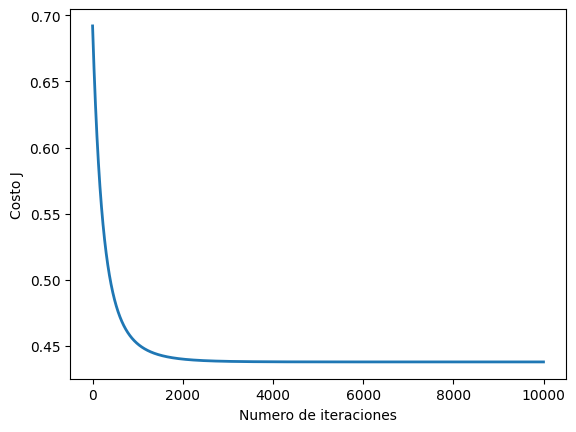

In [34]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 6.4130000e+03, 1.5598982e+07, 6.0200000e+02, 1.0000000e+00, 0.0000000e+00,
 5.3000000e+01, 5.0000000e+00, 9.8268840e+04, 1.0000000e+00, 0.0000000e+00,
 1.0000000e+00, 4.5038290e+04]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Un estudiante con nota del examen 1: {X_array[1]} y nota del examen 2: {X_array[2]} (usando el descenso por el gradiente):{aprueba}")